In [24]:
""" Statistical Analysis of time series"""
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import os

In [39]:
# Define start and end dates.
start_date = '2014-01-01'
end_date = '2014-01-31'
dates = pd.date_range(start_date,end_date)

# Building simple empty DataFrame with date indexing.
df1 = pd.DataFrame(index=dates)

def symbol_to_path(symbol, base_dir='data'):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp, how = 'inner')
        df.dropna()
    df = df.sort_index()
    return df

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    plot_data(df.ix[start_index:end_index,columns],title='Selected data')
    # Note: DO NOT modify anything else!
    
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

In [40]:
symbols = ['GOOG', 'IBM', 'AAPL']

# Get stock data
df = get_data(symbols, dates)

# Import gold to dataframe
df_temp = pd.read_csv(symbol_to_path('GOLD'), index_col="Date", parse_dates=True, usecols =['Date','USD (AM)'])
df_temp = df_temp.rename(columns={'USD (AM)':"GOLD"})
df = df.join(df_temp,how='inner')
df = df.sort_index()

print "Mean:\n", df.mean()
print "\nStandard deviation:\n", df.std()

Mean:
SPY     1822.356660
GOOG     567.620737
IBM      170.614700
AAPL      73.091708
GOLD    1242.511905
dtype: float64

Standard deviation:
SPY     24.874801
GOOG    10.969584
IBM      4.387731
AAPL     2.570714
GOLD    12.038084
dtype: float64


/Users/Stasiek/Developer/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  app.launch_new_instance()


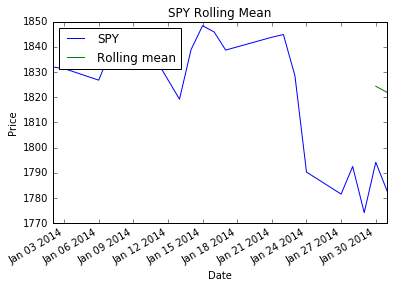

In [41]:
ax = df['SPY'].plot(title="SPY Rolling Mean", label='SPY')

rm_SPY = pd.rolling_mean(df['SPY'],window=20)
rm_SPY.plot(label='Rolling mean', ax=ax)

# Add labels to plot
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

/Users/Stasiek/Developer/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
/Users/Stasiek/Developer/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


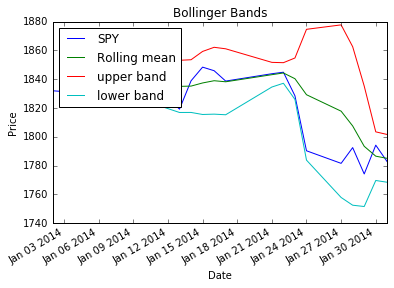

In [45]:
""" Create Bollinger Bands for SPY data """
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm+2*rstd
    lower_band = rm-2*rstd
    return upper_band, lower_band

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=5)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=5)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

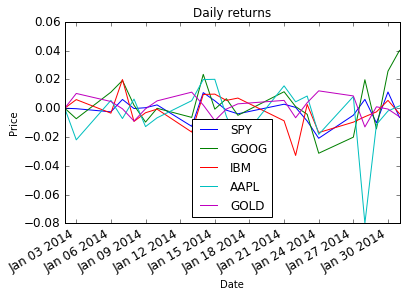

In [43]:
""" Get daily returns for stock"""

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    df = df.pct_change()
    df.ix[0,:] = 0
    return df

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns")